In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder,RobustScaler

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [ ]:
# Create Data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 5
noise = np.random.normal(0, 2, size=len(X))
y = y + noise
X = X.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient: 3.02416807187519
Intercept: 4.639570425966866


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print('\n')
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print('\n')
print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train MAE: 1.4882363271446233
Test MAE: 1.2026246949966244


Train MSE: 3.4538772202134824
Test MSE: 2.4881689691607125


Train R2: 0.9574760737191977
Test R2: 0.968345944528421


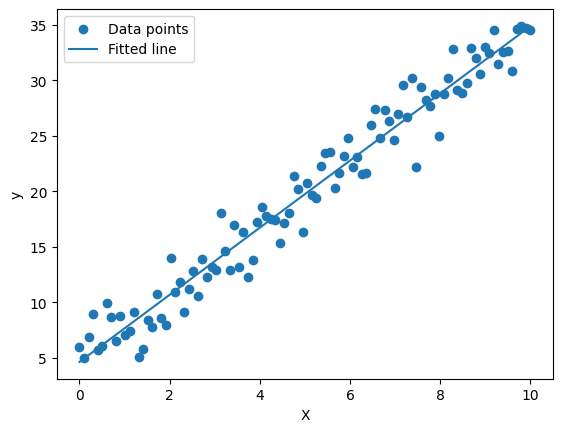

In [ ]:
plt.scatter(X, y, label="Data points")
plt.plot(X, model.predict(X), label="Fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [ ]:
np.random.seed(42)
n = 100
x1 = np.random.uniform(0, 10, n)
x2 = np.random.uniform(5, 15, n)
y = 4 * x1 + 2 * x2 + 10
noise = np.random.normal(0, 3, n)
y = y + noise
X = np.column_stack((x1, x2))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("coefficients:", model.coef_)
print("intercept:", model.intercept_)

coefficients: [3.92500663 2.23615212]
intercept: 8.199011851015193


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print('\n')
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print('\n')
print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train MAE: 2.3581083570659773
Test MAE: 2.1999444737700755


Train MSE: 9.170017396551563
Test MSE: 5.997888889786696


Train R2: 0.9468367835715478
Test R2: 0.9702227063146284


##Note
- ### No OverFitting Diff between train and test error not big
- ### NO UnderFitting R2 is good for train and test
- ### GOOD FIT

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [ ]:
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y = 2 * X**2 + 3 * X + 5
noise = np.random.normal(0, 5, size=len(X))
y = y + noise
X = X.reshape(-1, 1)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("coefficients:", model.coef_)
print("intercept:", model.intercept_)

coefficients: [3.05350446 2.03663083]
intercept: 4.089831742347634


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print('\n')
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print('\n')
print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train MAE: 3.7300929679290915
Test MAE: 3.00320738626071


Train MSE: 21.506445791337637
Test MSE: 15.490826125987445


Train R2: 0.9419059019269367
Test R2: 0.9288028202548416


# Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

100%|██████████| 2.33M/2.33M [00:00<00:00, 3.80MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohitgrewal/airlines-flights-data/versions/1


In [ ]:
os.listdir(path)

['airlines_flights_data.csv']

In [ ]:
full_path = os.path.join(path,os.listdir(path)[0])

## EDA

In [ ]:
import pandas as pd
df = pd.read_csv(full_path)

In [ ]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [ ]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


In [ ]:
df.duplicated().sum()

np.int64(0)

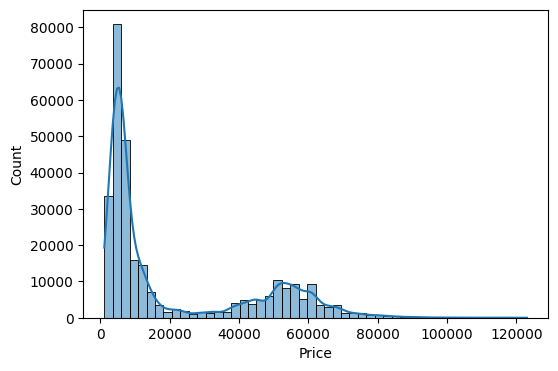

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

right-skewed

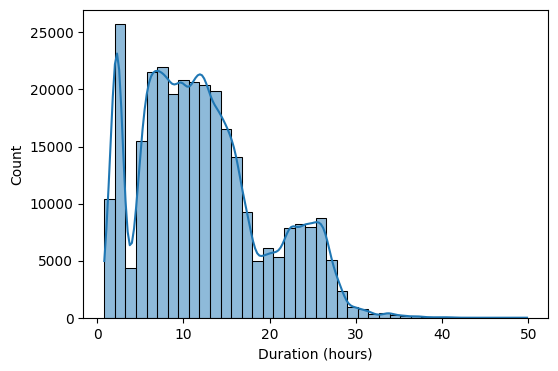

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['duration'], bins=40, kde=True)
plt.xlabel("Duration (hours)")
plt.ylabel("Count")
plt.show()

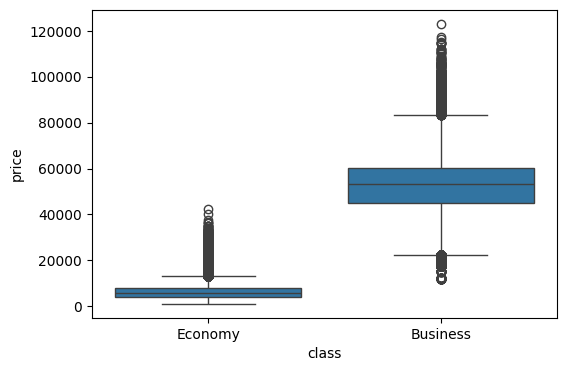

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='price', data=df)
plt.show()

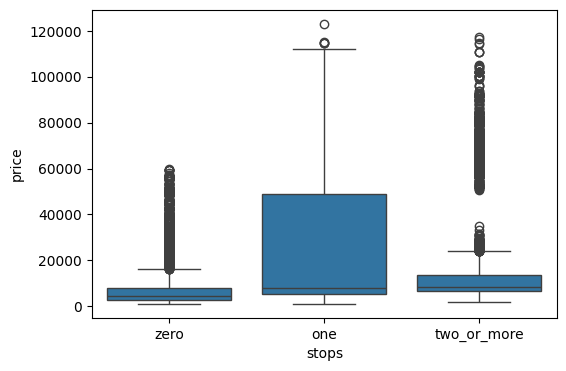

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stops', y='price', data=df)
plt.show()

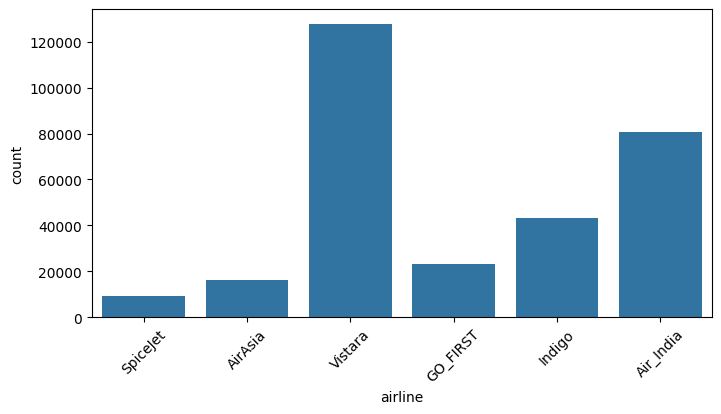

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='airline', data=df)
plt.xticks(rotation=45)
plt.show()

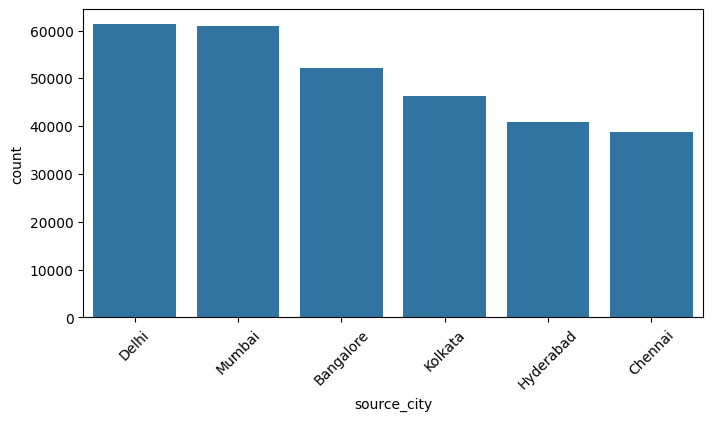

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='source_city', data=df)
plt.xticks(rotation=45)
plt.show()

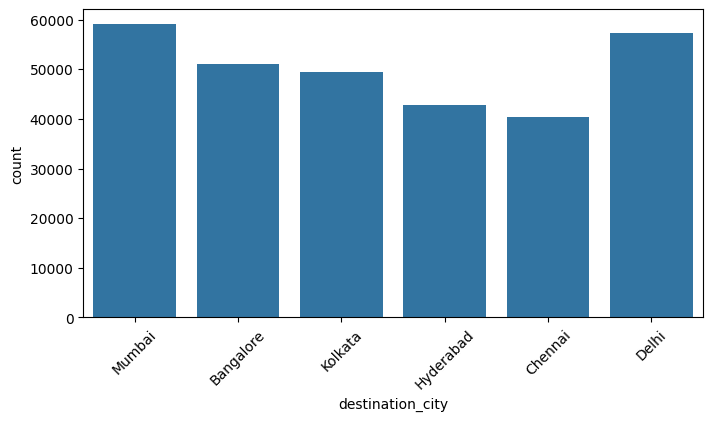

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='destination_city', data=df)
plt.xticks(rotation=45)
plt.show()

## Data Cleaning

- ### No Null Value
- ### No Duplicate

## Data Pre-processing

In [ ]:
df = pd.get_dummies(df, columns=['airline','source_city','destination_city','flight'], drop_first=True)

In [ ]:
ord_cols = ['class', 'stops', 'departure_time', 'arrival_time']
le = LabelEncoder()
for col in ord_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])

In [ ]:
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,flight_UK-986,flight_UK-988,flight_UK-993,flight_UK-994,flight_UK-995,flight_UK-996,class_encoded,stops_encoded,departure_time_encoded,arrival_time_encoded
0,Evening,zero,Night,Economy,2.17,1,5953,False,False,False,...,False,False,False,False,False,False,1,2,2,5
1,Early_Morning,zero,Morning,Economy,2.33,1,5953,False,False,False,...,False,False,False,False,False,False,1,2,1,4
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,False,False,False,...,False,False,False,False,False,False,1,2,1,1
3,Morning,zero,Afternoon,Economy,2.25,1,5955,False,False,False,...,False,False,False,False,True,False,1,2,4,0
4,Morning,zero,Morning,Economy,2.33,1,5955,False,False,False,...,False,False,False,False,False,False,1,2,4,4


In [ ]:
df.columns

Index(['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'price', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo',
       ...
       'flight_UK-986', 'flight_UK-988', 'flight_UK-993', 'flight_UK-994',
       'flight_UK-995', 'flight_UK-996', 'class_encoded', 'stops_encoded',
       'departure_time_encoded', 'arrival_time_encoded'],
      dtype='object', length=1586)

In [ ]:
df.drop(ord_cols,axis=1,inplace=True)

In [ ]:
df.columns

Index(['duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       ...
       'flight_UK-986', 'flight_UK-988', 'flight_UK-993', 'flight_UK-994',
       'flight_UK-995', 'flight_UK-996', 'class_encoded', 'stops_encoded',
       'departure_time_encoded', 'arrival_time_encoded'],
      dtype='object', length=1582)

In [ ]:
numeric_cols = ['duration', 'days_left', 'price']
print((df[numeric_cols] < 0).sum())

duration     0
days_left    0
price        0
dtype: int64


In [ ]:
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,flight_UK-986,flight_UK-988,flight_UK-993,flight_UK-994,flight_UK-995,flight_UK-996,class_encoded,stops_encoded,departure_time_encoded,arrival_time_encoded
0,2.17,1,5953,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1,2,2,5
1,2.33,1,5953,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1,2,1,4
2,2.17,1,5956,False,False,False,False,False,False,True,...,False,False,False,False,False,False,1,2,1,1
3,2.25,1,5955,False,False,False,False,True,False,True,...,False,False,False,False,True,False,1,2,4,0
4,2.33,1,5955,False,False,False,False,True,False,True,...,False,False,False,False,False,False,1,2,4,4


In [ ]:
df['log_price'] = np.log1p(df['price'])

In [ ]:
df.drop('price',axis=1,inplace=True)

## Scaling and Splitting Data

In [ ]:
numeric_features = ['duration', 'days_left']
target = 'log_price'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
numeric_features = ['duration','days_left']
scaler = RobustScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

In [ ]:
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

## Modeling

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train MAE: 0.23617313799428705
Test MAE: 0.23711528124288786
Train MSE: 0.09062468781390695
Test MSE: 0.09138745168858059
Train R2: 0.9267926298559273
Test R2: 0.9262136911217516


### Model Has A Very Good Fit
- No Over/Under Fitting

In [ ]:
import joblib
joblib.dump(model, '/content/flight_price_model.pkl')

['/content/flight_price_model.pkl']

### Don't forget Result is log price

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


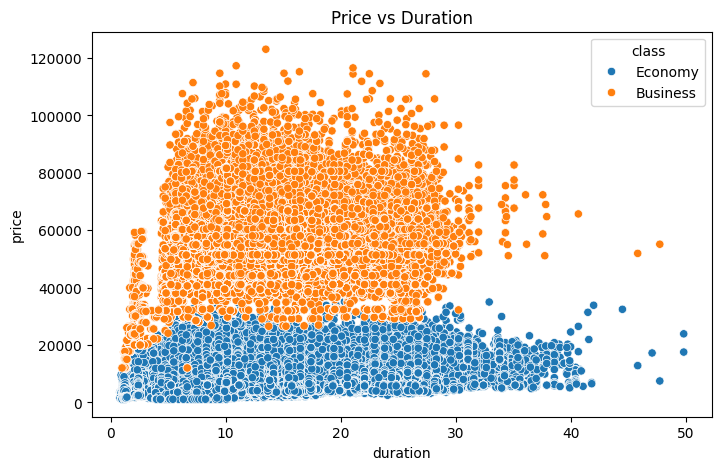

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='duration', y='price', hue='class', data=df)
plt.title('Price vs Duration')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


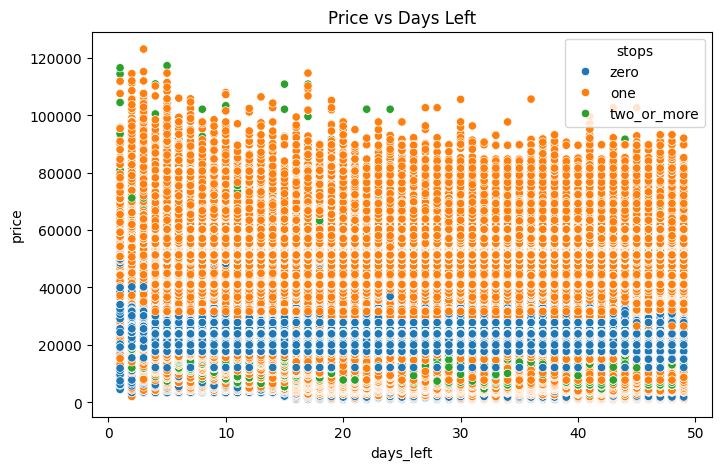

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='days_left', y='price', hue='stops', data=df)
plt.title('Price vs Days Left')
plt.show()

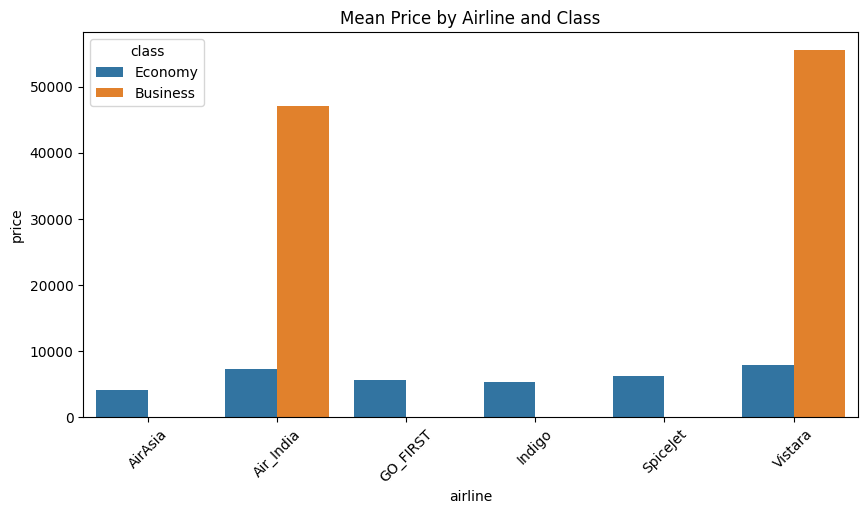

In [ ]:
plt.figure(figsize=(10, 5))
mean_price = df.groupby(['airline', 'class'])['price'].mean().reset_index()
sns.barplot(x='airline', y='price', hue='class', data=mean_price)
plt.title('Mean Price by Airline and Class')
plt.xticks(rotation=45)
plt.show()

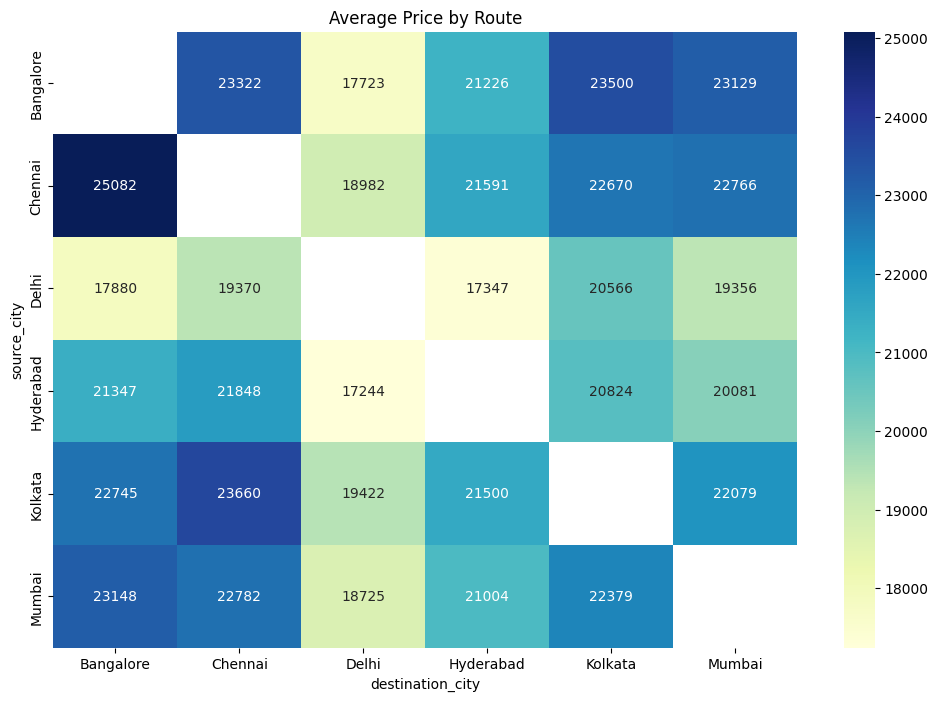

In [ ]:
pivot_route = df.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_route, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Price by Route')
plt.show()

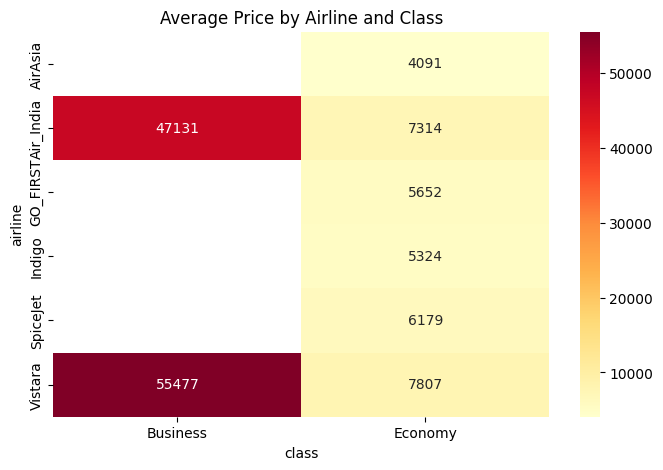

In [ ]:
pivot_airline_class = df.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_airline_class, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('Average Price by Airline and Class')
plt.show()

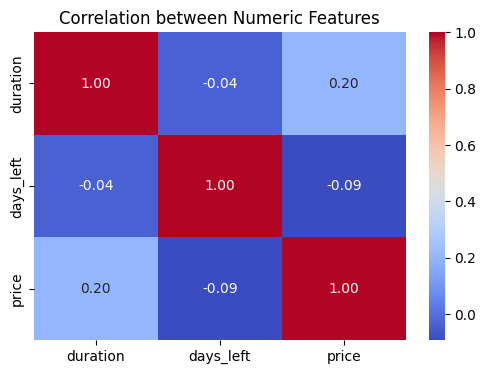

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numeric Features')
plt.show()